In [1]:
from bs4 import BeautifulSoup
import requests
import os
import pandas as pd
import numpy as np
from prettytable import PrettyTable
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import accuracy_score, precision_score, \
recall_score, confusion_matrix, f1_score

In [2]:
def soup(link):
    response=requests.get(link)
    r = response.text
    return BeautifulSoup(r,'html.parser')    
MichaelJackson= soup('https://www.lyrics.com/artist/Michael-Jackson/4576')
Maroon5=soup('https://www.lyrics.com/artist/Maroon-5/529962')

In [3]:

def extractLyrics(sp):
    dic={}
    lyrics={}
    artist=sp.find('div',id='featured-artist-avatar').get('data-artist')
    artist=artist.replace(" ", "")
    lyrics[artist]=[]
    
    
    sp=sp.find_all('div',class_='clearfix')
    
    path=os.getcwd()
    fol=path+'/Lyrics/'
    count = 0
    
    for s in sp:
        
        aLabel=s.find('h3',class_='artist-album-label')
        if aLabel: # Sometimes None 
            aLbl=aLabel.get_text()
            dic[aLbl]=[]
            songName=s.find_all('td',class_='tal qx')
            for sn in songName:
                link='https://www.lyrics.com'+sn.find('a').get('href')
                sn=sn.a.get_text()
                
                dic[aLbl].append(sn)
            
                count+=1
                if count <= 50:
                    linkResponse=requests.get(link).text
                    subsoup=BeautifulSoup(linkResponse,'html.parser')
                    if subsoup.find('pre',id='lyric-body-text'):
                        lyric=subsoup.find('pre',id='lyric-body-text').text
                        lyrics[artist].append(lyric)
                else:
                    break
                #print(f'Album:{aLbl}\n\nSong: {sn}\n\nLyrics: \n{lyric}', end='\n\n\n')
           
    return lyrics

In [4]:
lyrics=extractLyrics(MichaelJackson)
lyrics2=extractLyrics(Maroon5)

In [5]:
def corpusAndLabel(lyrics):
    corpus = [i for i in lyrics.values()]
    corpus=corpus[0]
    #print(corpus)
    labels=list(lyrics.keys())
    labels*=len(corpus)
    #print(labels)
    return corpus,labels

In [6]:
corpus, labels = corpusAndLabel(lyrics)
df1=pd.DataFrame({'lyrics':corpus, 'artist':labels})
corpus2,labels2 = corpusAndLabel(lyrics2)
df2=pd.DataFrame({'lyrics':corpus2, 'artist':labels2})
df2

,lyrics,artist
0,"Spent twenty-four hours, I need more hours wit...",Maroon5
1,"I was so high, I did not recognize\r\nThe fire...",Maroon5
2,Beauty queen of only eighteen she\r\nHad some ...,Maroon5
3,Just shoot for the stars if it feels right\r\n...,Maroon5
4,Beauty queen of only eighteen she\r\nHad some ...,Maroon5
5,"Say say say, hey hey now baby\r\nOh mama, don'...",Maroon5
6,"Say say say, hey hey now baby\r\nOh mama, don'...",Maroon5
7,Spent 24 hours\r\nI need more hours with you\r...,Maroon5
8,You got in so late\r\nIt's Sunday morning\r\nS...,Maroon5
9,Beauty queen of only eighteen she\r\nHad some ...,Maroon5


In [7]:
df=pd.concat([df1,df2])
print(df.tail())

                                               lyrics   artist
45  Dirty looks from your mother\r\nNever seen you...  Maroon5
46  Say say say, hey hey now baby\r\nOh mama, don'...  Maroon5
47  I don't wanna know, know, know, know\r\nWho's ...  Maroon5
48  Just shoot for the stars if it feels right\r\n...  Maroon5
49  I wake up, with blood-shot eyes\r\nStruggled t...  Maroon5


# Bag of Words and TF-IDF

In [8]:
#splitting the data
X,y=df['lyrics'],df['artist']
vectorizer = CountVectorizer()
cv = vectorizer.fit_transform(X)
tf = TfidfTransformer() 
#Use the CountVectorised data
X_norm = tf.fit_transform(cv)
y.shape

(99,)

In [9]:
X_norm_df=pd.DataFrame(X_norm.todense(), columns=vectorizer.get_feature_names(), index=y)
X_norm_df

/Users/niyantmehta/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,24,45,aah,aaow,abandoned,abc,about,abusin,abusing,accuse,...,yes,yesterday,yo,york,you,young,your,yours,yourself,youth
artist,,,,,,,,,,,,,,,,,,,,,
MichaelJackson,0.0,0.0,0.0,0.0,0.0,0.43031,0.055746,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.133730,0.0000,0.008356,0.0,0.023336,0.0
MichaelJackson,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0000,0.000000,0.0,0.000000,0.0
MichaelJackson,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,...,0.090849,0.0,0.0,0.0,0.312891,0.0000,0.024578,0.0,0.000000,0.0
MichaelJackson,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,...,0.036488,0.0,0.0,0.0,0.301600,0.0000,0.044421,0.0,0.000000,0.0
MichaelJackson,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.067027,0.0000,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Maroon5,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.276288,0.0000,0.036755,0.0,0.000000,0.0
Maroon5,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.118766,0.0132,0.000000,0.0,0.000000,0.0
Maroon5,0.0,0.0,0.0,0.0,0.0,0.00000,0.012095,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.237403,0.0000,0.043513,0.0,0.000000,0.0


# Feature Engineering

In [10]:
X_norm_df=X_norm_df.reset_index()
#changing artist column:  with 0 & 1
le = LabelEncoder()
X_norm_df['artist'] = le.fit_transform(X_norm_df['artist'])
X_norm_df


,artist,24,45,aah,aaow,abandoned,abc,about,abusin,abusing,...,yes,yesterday,yo,york,you,young,your,yours,yourself,youth
0,1,0.0,0.0,0.0,0.0,0.0,0.43031,0.055746,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.133730,0.0000,0.008356,0.0,0.023336,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0000,0.000000,0.0,0.000000,0.0
2,1,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,...,0.090849,0.0,0.0,0.0,0.312891,0.0000,0.024578,0.0,0.000000,0.0
3,1,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,...,0.036488,0.0,0.0,0.0,0.301600,0.0000,0.044421,0.0,0.000000,0.0
4,1,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.067027,0.0000,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.276288,0.0000,0.036755,0.0,0.000000,0.0
95,0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.118766,0.0132,0.000000,0.0,0.000000,0.0
96,0,0.0,0.0,0.0,0.0,0.0,0.00000,0.012095,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.237403,0.0000,0.043513,0.0,0.000000,0.0
97,0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.219749,0.0000,0.000000,0.0,0.000000,0.0


# Train-Test-Split

In [11]:
X=X_norm_df.drop(['artist'],axis=1)
y=X_norm_df['artist']
X.shape,y.shape

((99, 1685), (99,))

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
X_train

,24,45,aah,aaow,abandoned,abc,about,abusin,abusing,accuse,...,yes,yesterday,yo,york,you,young,your,yours,yourself,youth
62,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.093712,0.000000,0.096617,0.0,0.000000,0.0
23,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.344752,0.000000,0.057445,0.0,0.000000,0.0
39,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.012095,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.237403,0.000000,0.043513,0.0,0.000000,0.0
52,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.219749,0.000000,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,0.0,0.0,0.0,0.0,0.0,0.0,0.039473,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.292689,0.000000,0.035501,0.0,0.000000,0.0
50,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.022175,0.000000,0.030483,0.0,0.000000,0.0
90,0.0,0.0,0.0,0.0,0.0,0.0,0.012095,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.237403,0.000000,0.043513,0.0,0.000000,0.0
20,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.590800,0.000000,0.033149,0.0,0.046288,0.0


In [13]:
def print_evaluations(ytrue, ypred, model,modelName):
    
    """
    Function that compares several scores for a given model 
    and returns its result.
    """
    train=model.score(X_train, y_train)
    test=model.score(X_test, y_test)
    accuracyScore=round(accuracy_score(ytrue, ypred), 3)
    pre=round(precision_score(ytrue, ypred), 3)
    re=round(recall_score(ytrue, ypred), 3)
    f1=round(f1_score(ytrue, ypred), 3)
    
    #print(f'How does model {modelName} score:')
    print(f'Train Score: {train}')
    print(f'Test Score: {test}')
    print(f'The accuracy of the model is: {accuracyScore}')
    print(f'The precision of the model is: {pre}')
    print(f'The recall of the model is: {re}')
    print(f'The f1-score of the model is: {f1}')
    
    #cm = confusion_matrix(ytrue, ypred)
    return train,test,accuracyScore,modelName,pre,re,f1



# Classification model: 

## LogisticRegression

In [14]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
ypred_lr = lr.predict(X_test)

#recall and precision
#ValueError: pos_label=1 is not a valid label. It should be one of ['Maroon5', 'MichaelJackson'] 
#sol.: applied labelencoding on target column before train test split
train_lr, test_lr, accuracy_lr,modelName_lr,pre_lr,re_lr,f1_lr = print_evaluations(y_test, ypred_lr,lr, 'LogisticRegression')


Train Score: 0.972972972972973
Test Score: 0.96
The accuracy of the model is: 0.96
The precision of the model is: 0.929
The recall of the model is: 1.0
The f1-score of the model is: 0.963


### Confusion Matrix

<AxesSubplot:>

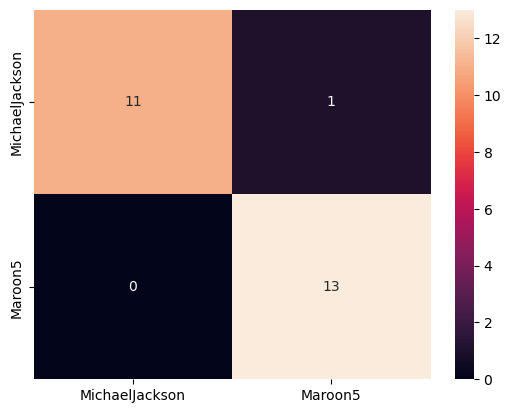

In [15]:
#ConfusionMatrixDisplay.from_predictions(y_test,ypred_lr, normalize=None)
sns.heatmap(confusion_matrix(y_test,ypred_lr),xticklabels=['MichaelJackson', 'Maroon5'],
                yticklabels=['MichaelJackson', 'Maroon5'],annot=True)

## RandomForest

In [16]:
forest = RandomForestClassifier()
#searching for best max_depth
forest_params = {"max_depth": range(50,70)}

forest_grid = GridSearchCV(forest, forest_params, cv=5, verbose=True)

forest_grid.fit(X_train,y_train)
ypred_f = forest_grid.predict(X_test)

train_rf, test_rf, accuracy_rf,modelName_rf,pre_rf,re_rf,f1_rf  = print_evaluations(y_test, ypred_f,forest_grid, 'RandomForest')

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Train Score: 1.0
Test Score: 1.0
The accuracy of the model is: 1.0
The precision of the model is: 1.0
The recall of the model is: 1.0
The f1-score of the model is: 1.0


### Confusion Matrix

<AxesSubplot:>

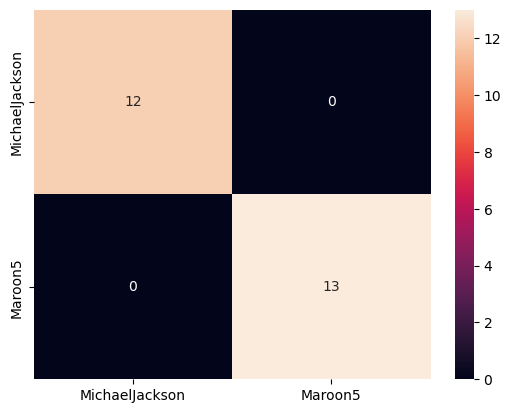

In [17]:
#ConfusionMatrixDisplay.from_predictions(y_test,ypred_f, normalize=None)
sns.heatmap(confusion_matrix(y_test,ypred_f),xticklabels=['MichaelJackson', 'Maroon5'],
                yticklabels=['MichaelJackson', 'Maroon5'],annot=True)

## Naive Bayes (Bayes' Theorem)

In [18]:
m = MultinomialNB(alpha = 0.01)
m.fit(X_train, y_train)

ypred_m = m.predict(X_test)

train_nb, test_nb, accuracy_nb,modelName_nb,pre_nb,re_nb,f1_nb  = print_evaluations(y_test, ypred_m,m, 'Naive Bayes')

Train Score: 1.0
Test Score: 0.96
The accuracy of the model is: 0.96
The precision of the model is: 0.929
The recall of the model is: 1.0
The f1-score of the model is: 0.963


### Confusion Matrix

<AxesSubplot:>

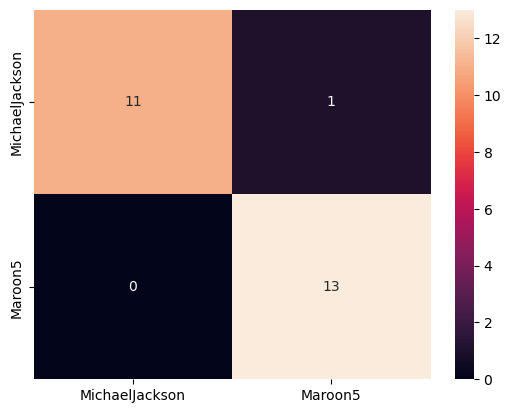

In [19]:
#ConfusionMatrixDisplay.from_predictions(y_test,ypred_m, normalize=None)

sns.heatmap(confusion_matrix(y_test,ypred_m),xticklabels=['MichaelJackson', 'Maroon5'],
                yticklabels=['MichaelJackson', 'Maroon5'],annot=True)

# Result

In [20]:
myTable = PrettyTable(["Model", "Train Score", "Test Score","Accuracy Score","Precision","Recall","F1"])
myTable.add_row([modelName_lr, format(train_lr, '.2f'), format(test_lr, '.2f'), format(accuracy_lr, '.2f'), format(pre_lr, '.2f'), format(re_lr, '.2f'), format(f1_lr, '.2f')])
myTable.add_row([modelName_rf, format(train_rf, '.2f'), format(test_rf, '.2f'), format(accuracy_rf, '.2f'), format(pre_rf, '.2f'), format(re_rf, '.2f'), format(f1_rf, '.2f')])
myTable.add_row([modelName_nb, format(train_nb, '.2f'), format(accuracy_nb, '.2f'), format(accuracy_nb, '.2f'), format(pre_nb, '.2f'), format(re_nb, '.2f'), format(f1_nb, '.2f')])
print(myTable)

+--------------------+-------------+------------+----------------+-----------+--------+------+
|       Model        | Train Score | Test Score | Accuracy Score | Precision | Recall |  F1  |
+--------------------+-------------+------------+----------------+-----------+--------+------+
| LogisticRegression |     0.97    |    0.96    |      0.96      |    0.93   |  1.00  | 0.96 |
|    RandomForest    |     1.00    |    1.00    |      1.00      |    1.00   |  1.00  | 1.00 |
|    Naive Bayes     |     1.00    |    0.96    |      0.96      |    0.93   |  1.00  | 0.96 |
+--------------------+-------------+------------+----------------+-----------+--------+------+


In [21]:
#everytime i run the code and getting different scores:::because i didnt fixed random seed